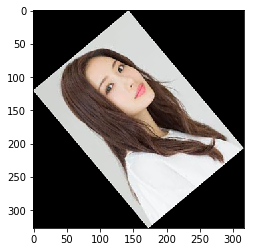

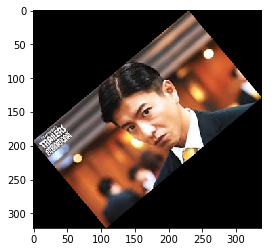

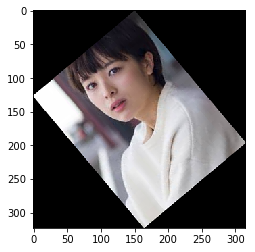

In [7]:
#Affine変換(大きさ合わせる)
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob

imgs = glob.glob('./images/*')

for img in imgs:
    rgb = cv2.imread(img, cv2.IMREAD_COLOR)
    gray  = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
    h, w = gray.shape[:2]
    size = (w, h)

    # 回転角の指定
    angle = 40
    angle_rad = angle/180.0*np.pi

    # 回転後の画像サイズを計算
    w_rot = int(np.round(h*np.absolute(np.sin(angle_rad))+w*np.absolute(np.cos(angle_rad))))
    h_rot = int(np.round(h*np.absolute(np.cos(angle_rad))+w*np.absolute(np.sin(angle_rad))))
    size_rot = (w_rot, h_rot)

    # 元画像の中心を軸に回転する
    center = (w/2, h/2)
    scale = 1.0
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

    # 平行移動を加える (rotation + translation)
    affine_matrix = rotation_matrix.copy()
    affine_matrix[0][2] = affine_matrix[0][2] -w/2 + w_rot/2
    affine_matrix[1][2] = affine_matrix[1][2] -h/2 + h_rot/2

    img_rot = cv2.warpAffine(gray, affine_matrix, size_rot, flags=cv2.INTER_CUBIC)

    cv2.imwrite('img_rot.jpg', img_rot)
    plt.imshow(img_rot)
    plt.show()